<a href="https://colab.research.google.com/github/JLdosReis/trabalho-pratico-IA/blob/main/exaula_end_to_end_machine_learning_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Trabalho prático de Inteligência Artificial

Este projeto foi desenvolvido como parte da disciplina de **Inteligência Artificial**.  
Nosso objetivo é aplicar diferentes técnicas de pré-processamento de dados, modelagem e avaliação de desempenho em um conjunto de dados clássico: a **base de sobreviventes do Titanic**.  

A partir dessa base, buscamos explorar desde a **limpeza e transformação dos atributos** até a **criação de pipelines de machine learning**, finalizando com a avaliação de modelos como **Logistic Regression** e **SVC**.  


This project requires Python 3.7 or above:


In [ ]:
import sys

assert sys.version_info >= (3, 7)

It also requires Scikit-Learn ≥ 1.0.1:


In [ ]:
from packaging import version
import sklearn

assert version.parse(sklearn.__version__) >= version.parse("1.0.1")

# Recebendo os Dados

In [ ]:
import pandas as pd

url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
titanic = pd.read_csv(url)

### Download da Base de Dados

Nesta etapa, utilizamos a biblioteca **Pandas** para importar a base de dados do Titanic.  
O dataset foi obtido a partir de um link público no GitHub e contém informações sobre passageiros, como idade, sexo, classe, tarifa paga, entre outros.  
Esse conjunto de dados é muito utilizado em projetos de aprendizado de máquina para prever a sobrevivência dos passageiros.

## Análise Exploratória Inicial dos Dados

### Visualização Inicial dos Dados

Após carregar a base de dados, utilizamos o comando `.head()` para visualizar as primeiras 5 linhas.  
Isso nos permite ter uma ideia da estrutura do dataset e das variáveis disponíveis.

### Estrutura do Dataset

Com o comando `.info()`, analisamos a estrutura dos dados:  
- Quantidade de registros e colunas  
- Tipo de dados de cada coluna (int, float, object)  
- Presença de valores nulos  

Essa análise é importante para planejarmos o pré-processamento dos dados.

### Estatísticas Descritivas

O método `.describe()` gera estatísticas básicas, como:  
- Média, mínimo e máximo  
- Desvio padrão  
- Quartis  

Essas informações ajudam a entender a distribuição das variáveis numéricas.

### Análise de Valores Ausentes

Com o comando `.isnull().sum()`, identificamos colunas que possuem valores faltantes.  
Isso é fundamental para decidir estratégias de tratamento, como:  
- Preencher valores nulos com médias/medianas/moda  
- Excluir colunas ou linhas específicas  
- Criar variáveis adicionais que indiquem a ausência de dados



In [ ]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
titanic.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


Sex
male      577
female    314
Name: count, dtype: int64
Pclass
3    491
1    216
2    184
Name: count, dtype: int64
Embarked
S    644
C    168
Q     77
Name: count, dtype: int64


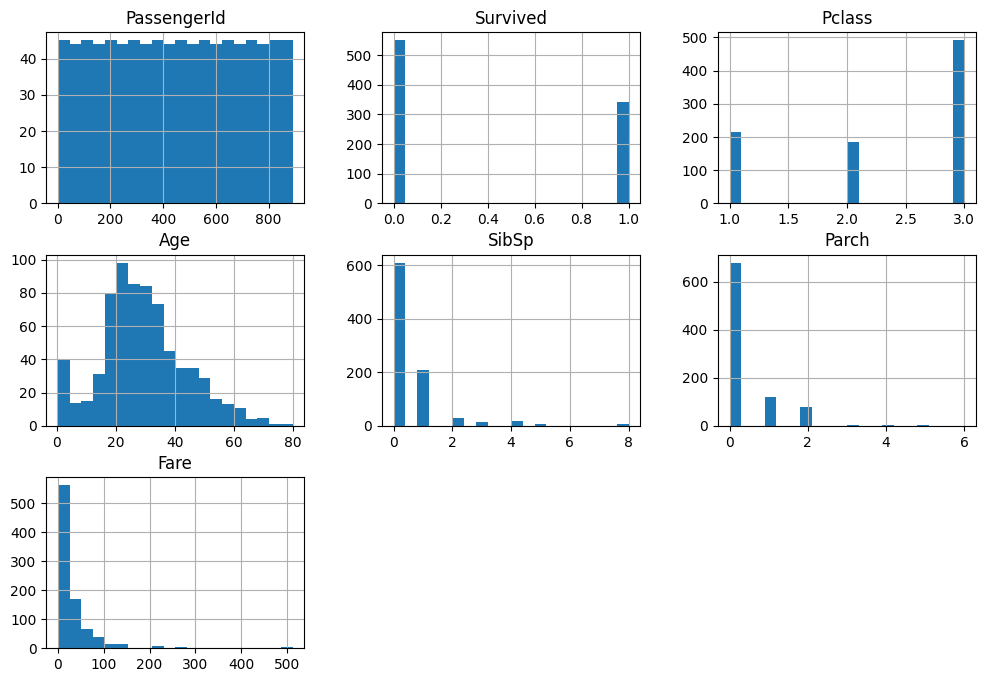

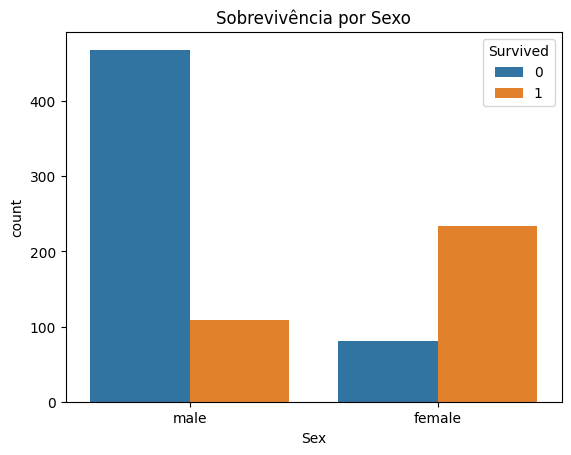

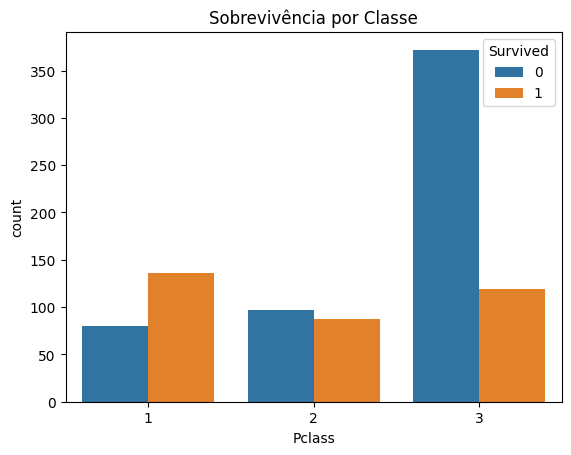

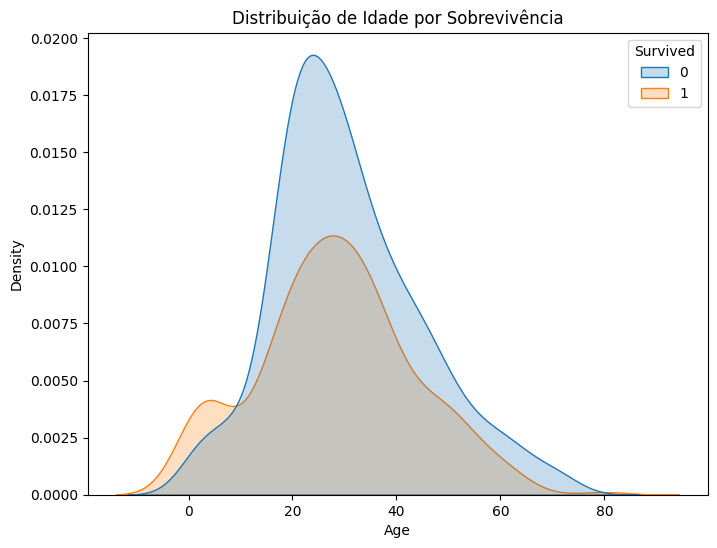

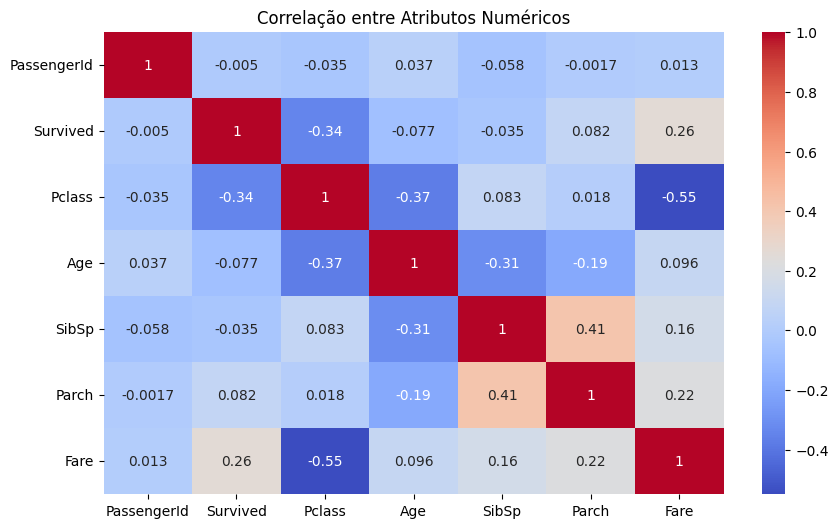

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Colunas categóricas
print(titanic['Sex'].value_counts())
print(titanic['Pclass'].value_counts())
print(titanic['Embarked'].value_counts())

# Histograma das variáveis numéricas
titanic.hist(bins=20, figsize=(12, 8))
plt.show()

# Sobrevivencia por sexo
sns.countplot(data=titanic, x='Sex', hue='Survived')
plt.title("Sobrevivência por Sexo")
plt.show()

# Sobrevivencia por classe
sns.countplot(data=titanic, x='Pclass', hue='Survived')
plt.title("Sobrevivência por Classe")
plt.show()

# Distribuição de Idade por sobrevivencia
plt.figure(figsize=(8,6))
sns.kdeplot(data=titanic, x="Age", hue="Survived", fill=True)
plt.title("Distribuição de Idade por Sobrevivência")
plt.show()

# Correlação entre atributos numéricos
plt.figure(figsize=(10, 6))
sns.heatmap(titanic.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlação entre Atributos Numéricos")
plt.show()

## Criação do Conjunto de Teste

Para avaliarmos o desempenho do modelo de forma justa, é importante separar os dados em **conjunto de treino** e **conjunto de teste**.  
Utilizamos a técnica **Stratified Shuffle Split**, que garante que a proporção de sobreviventes seja mantida nos dois conjuntos, evitando viés na amostragem.  

- **Treino:** 80% dos dados  
- **Teste:** 20% dos dados  
- **Estratificação:** baseada na coluna `Survived`  

Essa abordagem é especialmente importante quando trabalhamos com dados **desbalanceados**, garantindo que ambos os conjuntos representem bem a realidade.


In [ ]:
# Importa a biblioteca necessária
from sklearn.model_selection import StratifiedShuffleSplit

# Prepara a divisão estratificada com base na coluna 'Survived'
# Isso garante que o teste tenha a mesma proporção de sobreviventes que o dataset original
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

# Cria os conjuntos de treino e teste
for train_index, test_index in split.split(titanic, titanic["Survived"]):
    strat_train_set = titanic.loc[train_index]
    strat_test_set = titanic.loc[test_index]

# Verifica os resultados
print("Tamanho do conjunto de treino:", len(strat_train_set))
print("Tamanho do conjunto de teste:", len(strat_test_set))

# Copia o conjunto de treino para uma nova variável para as próximas etapas.
train_set = strat_train_set.copy()

Tamanho do conjunto de treino: 712
Tamanho do conjunto de teste: 179


# Descoberta e Visualização dos Dados para Obter Insights

### Análise Gráfica da Sobrevivência

Nesta etapa, exploramos visualmente as relações entre variáveis do dataset e a sobrevivência dos passageiros.
Utilizamos a biblioteca Seaborn para gerar gráficos que ajudam a identificar padrões.

Gráfico 1: Proporção geral de sobreviventes e não sobreviventes

Gráfico 2: Relação entre Classe (Pclass) e sobrevivência

Gráfico 3: Relação entre Sexo e sobrevivência

Gráfico 4: Distribuição de Idade por status de sobrevivência

Essas visualizações fornecem uma visão inicial sobre quais fatores podem ter influenciado a chance de sobrevivência.

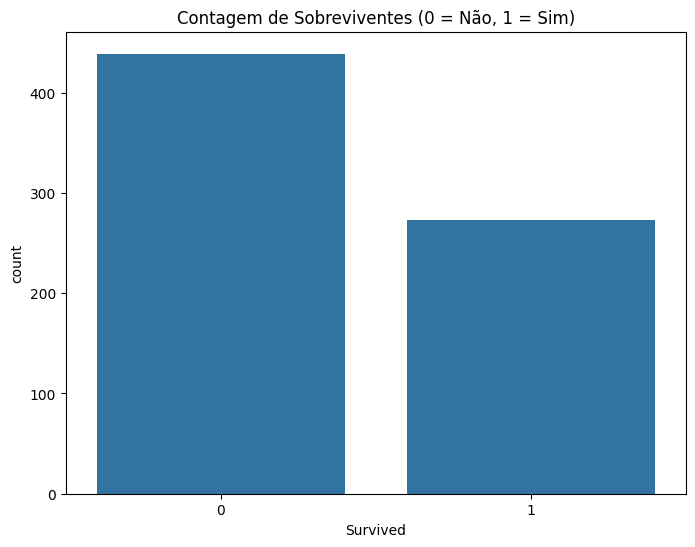

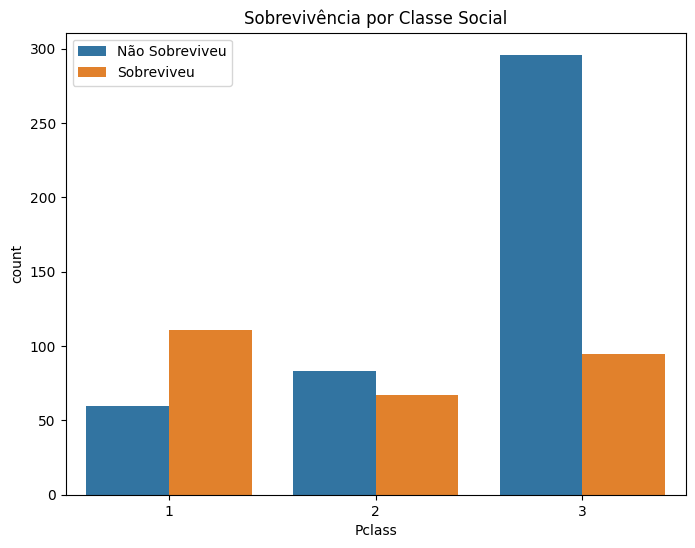

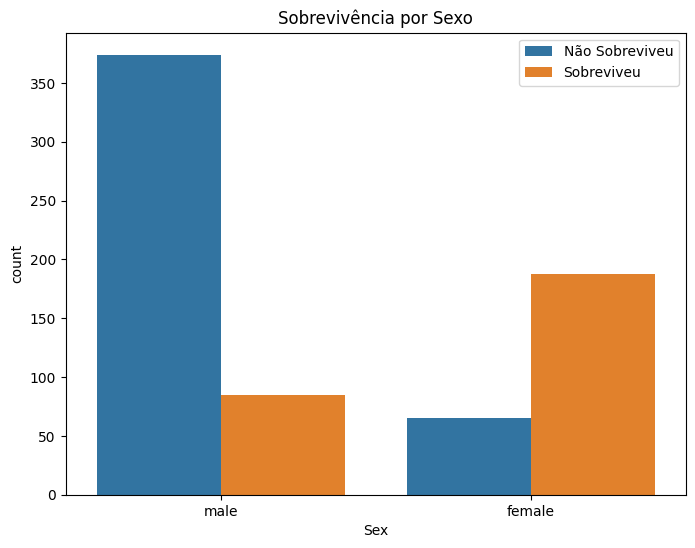

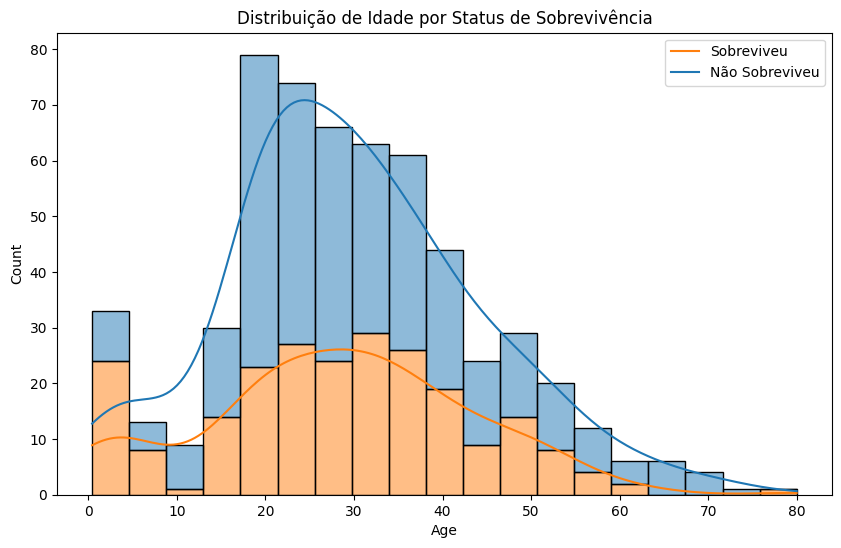

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# A variável 'train_set' é o nosso conjunto de treino já dividido
# Vamos explorar as relações dentro dele

# Gráfico 1: Proporção de Sobreviventes
plt.figure(figsize=(8, 6))
sns.countplot(x='Survived', data=train_set)
plt.title('Contagem de Sobreviventes (0 = Não, 1 = Sim)')
plt.show()

# Gráfico 2: Relação entre Classe (Pclass) e Sobrevivência
plt.figure(figsize=(8, 6))
sns.countplot(x='Pclass', hue='Survived', data=train_set)
plt.title('Sobrevivência por Classe Social')
plt.legend(['Não Sobreviveu', 'Sobreviveu'])
plt.show()

# Gráfico 3: Relação entre Sexo e Sobrevivência
plt.figure(figsize=(8, 6))
sns.countplot(x='Sex', hue='Survived', data=train_set)
plt.title('Sobrevivência por Sexo')
plt.legend(['Não Sobreviveu', 'Sobreviveu'])
plt.show()

# Gráfico 4: Distribuição de Idade por Sobrevivência
plt.figure(figsize=(10, 6))
sns.histplot(data=train_set, x='Age', hue='Survived', kde=True, multiple="stack")
plt.title('Distribuição de Idade por Status de Sobrevivência')
plt.legend(['Sobreviveu', 'Não Sobreviveu'])
plt.show()

## Buscando por correlações
### Correlação Entre Atributos

Agora buscamos entender as relações estatísticas entre os atributos numéricos.

Criamos uma matriz de correlação com `corr()`

Observamos quais variáveis possuem maior relação com a sobrevivência `(Survived)`

Adicionamos um novo atributo chamado FamilySize, que representa o tamanho da família a bordo `(pais/filhos + irmãos/cônjuges + 1)`

Recalculamos a correlação para verificar se o novo atributo traz informações úteis

Essa etapa é importante porque nos ajuda a selecionar as variáveis mais relevantes para o modelo.

In [ ]:
# Calcula a matriz de correlação para todos os atributos numéricos
corr_matrix = train_set.corr(numeric_only=True)

# Exibe a correlação de cada atributo com a coluna "Survived", ordenado do maior para o menor
print("Correlação dos atributos com a Sobrevivência:")
print(corr_matrix["Survived"].sort_values(ascending=False))

Correlação dos atributos com a Sobrevivência:
Survived       1.000000
Fare           0.275499
Parch          0.084178
PassengerId    0.011892
SibSp         -0.026115
Age           -0.084268
Pclass        -0.348007
Name: Survived, dtype: float64


In [ ]:
# Criação do atributo "FamilySize" (Tamanho da Família)
# Somamos irmãos/cônjuges + pais/filhos + 1 (a própria pessoa)
train_set["FamilySize"] = train_set["SibSp"] + train_set["Parch"] + 1

# Agora, vamos recalcular a matriz de correlação para ver se o nosso novo atributo é útil
corr_matrix = train_set.corr(numeric_only=True)

print("\nNova correlação (com FamilySize) com a Sobrevivência:")
print(corr_matrix["Survived"].sort_values(ascending=False))


Nova correlação (com FamilySize) com a Sobrevivência:
Survived       1.000000
Fare           0.275499
Parch          0.084178
FamilySize     0.026967
PassengerId    0.011892
SibSp         -0.026115
Age           -0.084268
Pclass        -0.348007
Name: Survived, dtype: float64


### Visualização de Relações Multivariadas

Por fim, utilizamos o Pairplot do Seaborn para observar múltiplas relações ao mesmo tempo.

Selecionamos os atributos mais relevantes: `Survived`, `Pclass`, `Age`, `Fare`, `FamilySize`

Geramos um gráfico de dispersão com coloração baseada na sobrevivência

Isso nos permite observar padrões em duas dimensões e verificar possíveis interações entre atributos


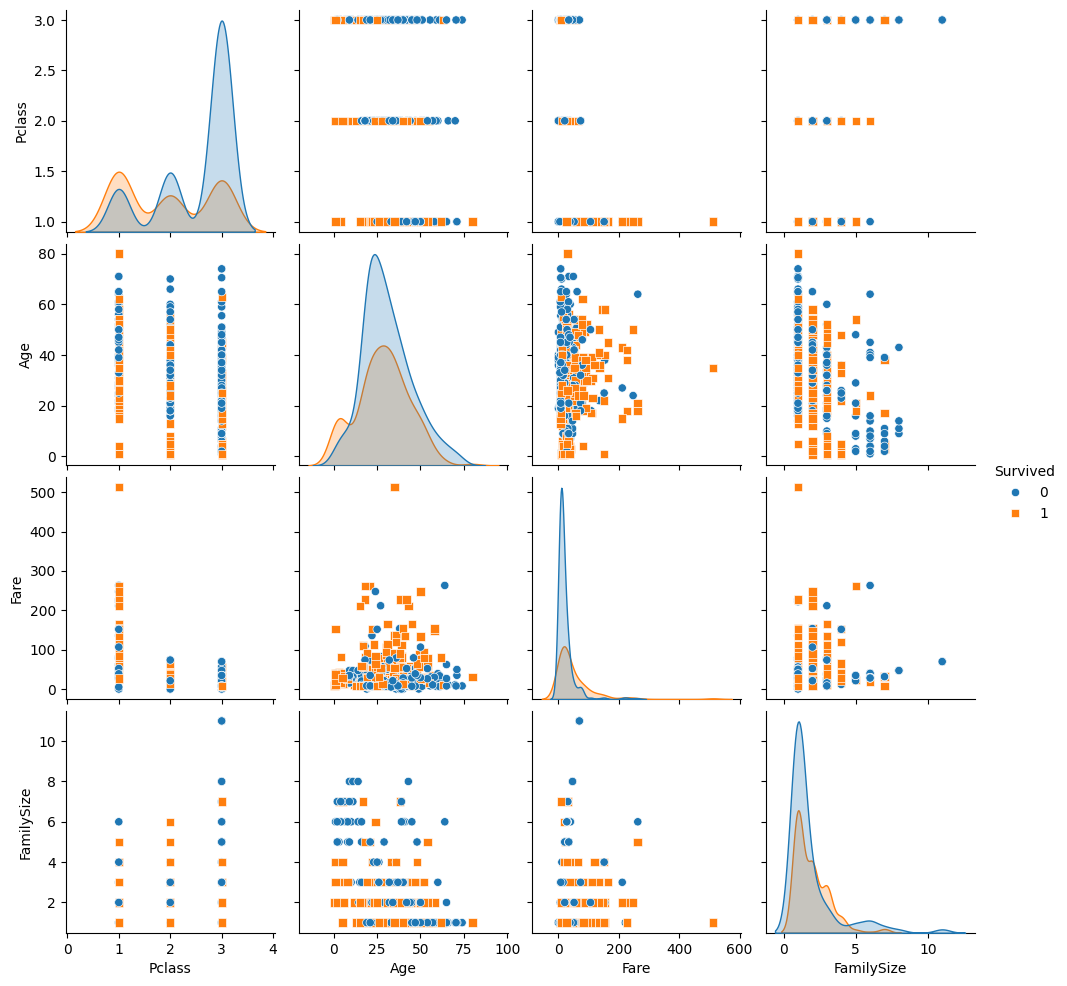

In [ ]:
import seaborn as sns

# Seleciona os atributos mais interessantes para visualizar as relações
attributes = ["Survived", "Pclass", "Age", "Fare", "FamilySize"]

# Cria o pairplot, colorindo os pontos por status de sobrevivência
# hue='Survived' é o que faz a mágica de separar os grupos
sns.pairplot(train_set[attributes], hue='Survived', markers=["o", "s"])
plt.show()

# Limpeza de dados

- Idade (Age): contém valores ausentes --> preenchemos com a mediana.
- Porto de embarque (Embarked): contém valores ausentes --> usamos a moda (porto mais frequente).
- Cabine (Cabin): muitos valores ausentes --> criamos atributo binário **HasCabin** (1 se tem, 0 se não).

In [ ]:
from sklearn.impute import SimpleImputer
import numpy as np

# Age with median
age_imputer = SimpleImputer(strategy="median")
train_set["Age"] = age_imputer.fit_transform(train_set[["Age"]])

# Embarked with moda
embarked_imputer = SimpleImputer(strategy="most_frequent")
train_set["Embarked"] = embarked_imputer.fit_transform(train_set[["Embarked"]]).ravel()

# HasCabin
train_set["HasCabin"] = train_set["Cabin"].notnull().astype(int)

In [ ]:
print("Valores ausentes:")
print(train_set.isnull().sum())

Valores ausentes:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          552
Embarked         0
FamilySize       0
HasCabin         0
dtype: int64


## ATENÇÃO:
# NÃO EXECUTAR OS CÓDIGOS DE **TRANSFORMAÇÃO DE ATRIBUTOS** E **ESCALONAMENTO**, POIS A PIPELINE JÁ FAZ ISSO E PODE CAUSAR CONFLITO E ERRO NA PIPELINE

## Transformação de atributos (feature engineering + categóricos)
Nesta etapa, realizamos a **engenharia de atributos** e a preparação de variáveis categóricas para o modelo.

- **Sexo (Sex):** convertido para variável numérica (0 = masculino, 1 = feminino).  
- **IsAlone:** variável criada para indicar se o passageiro estava sozinho (1) ou acompanhado (0).  
- **Título (Title):** extraído do nome, representando informações sociais/relevantes (Sr., Mrs., Miss, etc.).  
  - Títulos muito raros foram agrupados na categoria "Other".  
- **One-Hot Encoding:** aplicado para variáveis categóricas como *Embarked*, *Pclass* e *Title*, gerando colunas binárias.  

###⚠️ **Atenção:** Não é necessário rodar este código se a **pipeline** já estiver sendo utilizada, pois ela executa todas essas transformações automaticamente.


In [ ]:
import re
import pandas as pd

# Codificação de Sex
train_set["Sex"] = train_set["Sex"].map({"male": 0, "female": 1})

# Criar atributo IsAlone
train_set["IsAlone"] = (train_set["FamilySize"] == 1).astype(int)

#Atributo Title a partir do Name
def extract_title(name):
  match = re.search(r",\s*([^\.]+)\.", name)
  if match:
    return match.group(1).strip()
  return "Other"

train_set["Title"] = train_set["Name"].apply(extract_title)

# Agrupar títulos menos comuns
rare_titles = ["Lady", "Countess", "Capt", "Col", "Don", "Dr", "Major", "Rev", "Sir", "Jonkheer", "Dona"]
train_set["Title"] = train_set["Title"].replace(rare_titles, "Other")
train_set["Title"] = train_set["Title"].replace({"Mile": "Miss", "Ms": "Miss", "Mme": "Mrs"})

# One-Hot Encoding para Embarked, Pclass e Title
train_set = pd.get_dummies(train_set, columns=["Embarked", "Pclass", "Title"], drop_first=True)

In [ ]:
print(train_set.head())

     PassengerId  Survived                                         Name  Sex  \
692          693         1                                 Lam, Mr. Ali    0   
481          482         0             Frost, Mr. Anthony Wood "Archie"    0   
527          528         0                           Farthing, Mr. John    0   
855          856         1                   Aks, Mrs. Sam (Leah Rosen)    1   
801          802         1  Collyer, Mrs. Harvey (Charlotte Annie Tate)    1   

      Age  SibSp  Parch      Ticket      Fare Cabin  ...  IsAlone  Embarked_Q  \
692  28.5      0      0        1601   56.4958   NaN  ...        1       False   
481  28.5      0      0      239854    0.0000   NaN  ...        1       False   
527  28.5      0      0    PC 17483  221.7792   C95  ...        1       False   
855  18.0      0      1      392091    9.3500   NaN  ...        0       False   
801  31.0      1      1  C.A. 31921   26.2500   NaN  ...        0       False   

     Embarked_S  Pclass_2  Pclas

## Escalonamento

O escalonamento é importante para normalizar as variáveis numéricas, evitando que atributos em escalas diferentes prejudiquem o treinamento.

- Aplicamos o **StandardScaler**, que transforma os valores para média 0 e desvio padrão 1.  
- Variáveis numéricas escalonadas: **Age, Fare, FamilySize**.  

###⚠️**Atenção:** Assim como na transformação de atributos, este passo já está incluído na **pipeline**. **Não** é necessário rodar esta célula separadamente se a pipeline estiver em uso.


In [ ]:
from sklearn.preprocessing import StandardScaler

# Colunas numéricas para escalonamento
numeric_features = ["Age", "Fare", "FamilySize"]
scaler = StandardScaler()
train_set[numeric_features] = scaler.fit_transform(train_set[numeric_features])

In [ ]:
print(train_set[numeric_features].describe().round(2))

          Age    Fare  FamilySize
count  712.00  712.00      712.00
mean     0.00   -0.00        0.00
std      1.00    1.00        1.00
min     -2.24   -0.66       -0.56
25%     -0.58   -0.50       -0.56
50%     -0.08   -0.36       -0.56
75%      0.50   -0.02        0.07
max      3.88   10.01        5.74


## Pipeline Completa

A pipeline integra todas as etapas de **pré-processamento** em um único fluxo, garantindo consistência e evitando repetição de código.

**Etapas incluídas:**
1. **Engenharia de atributos:** criação de *FamilySize*, *IsAlone*, *HasCabin* e extração de *Title*.  
2. **Tratamento de valores ausentes:** imputação com mediana (variáveis numéricas) e moda (variáveis categóricas).  
3. **Codificação categórica:** One-Hot Encoding para variáveis como *Sex*, *Embarked*, *Pclass* e *Title*.  
4. **Escalonamento:** padronização das variáveis numéricas (*Age*, *Fare*, *FamilySize*).  
5. **Integração final:** combina todas as transformações e gera os dados prontos para o treinamento.

Com isso, garantimos que os mesmos passos serão aplicados tanto no **treinamento** quanto nos **dados de teste**, evitando vazamento de informação e inconsistências.



In [ ]:
import pandas as pd
import numpy as np
import re

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, FunctionTransformer
from sklearn.impute import SimpleImputer

def add_features(df):
    """Cria FamilySize, IsAlone, HasCabin e extrai Title"""
    df = df.copy()
    df["FamilySize"] = df["SibSp"] + df["Parch"] + 1
    df["IsAlone"] = (df["FamilySize"] == 1).astype(int)
    df["HasCabin"] = df["Cabin"].notnull().astype(int)

    def extract_title(name):
        match = re.search(r",\s*([^\.]+)\.", name)
        if match:
            return match.group(1).strip()
        return "Other"
    df["Title"] = df["Name"].apply(extract_title)

    rare_titles = ["Lady", "Countess", "Capt", "Col", "Don", "Dr", "Major", "Rev",
                   "Sir", "Jonkheer", "Dona"]
    df["Title"] = df["Title"].replace(rare_titles, "Other")
    df["Title"] = df["Title"].replace({"Mlle": "Miss", "Ms": "Miss", "Mme": "Mrs"})
    return df

feature_engineering = FunctionTransformer(add_features)

# Definir colunas

numeric_features = ["Age", "Fare", "FamilySize"]
categorical_features = ["Sex", "Embarked", "Pclass", "Title"]
binary_features = ["IsAlone", "HasCabin"]

# Transformers

# Numéricos: imputação + escalonamento
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

# Categóricos: imputação + one-hot
categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore", drop="first"))
])

# Binários: só passam direto
binary_transformer = "passthrough"

# ColumnTransformer

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features),
        ("bin", binary_transformer, binary_features)
    ]
)

# Pipeline final

pipeline = Pipeline(steps=[
    ("features", feature_engineering),
    ("preprocessor", preprocessor)
])

X_train = pipeline.fit_transform(train_set)
X_test = pipeline.transform(strat_test_set)

print("Shape X_train:", X_train.shape)
print("Shape X_test:", X_test.shape)


Shape X_train: (712, 14)
Shape X_test: (179, 14)


/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


# Construção do Modelo

# Baseline com DummyClassifier

Antes de avaliar modelos mais sofisticados, é importante definir uma baseline para termos uma referência de desempenho.
Utilizamos o **DummyClassifier** com a estratégia `"most_frequent"`, que sempre prevê a classe mais comum.

Isso nos mostra qual seria a performance mínima aceitável, sem nenhum aprendizado real. Se nossos modelos não superarem esse baseline, significa que não estão de fato aprendendo.

In [ ]:
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import cross_val_score

y_train = train_set["Survived"]
y_test = strat_test_set["Survived"]

# Baseline
dummy_clf = DummyClassifier(strategy="most_frequent")
scores = cross_val_score(dummy_clf, X_train, y_train, cv=5, scoring="accuracy")

In [ ]:
print("DummyClassifier - Acurácia média (cross-val):", scores.mean())

DummyClassifier - Acurácia média (cross-val): 0.6165763813651137


# Modelos clássicos
Nesta etapa, testamos alguns modelos clássicos de classificação para o problema do Titanic:

- **Logistic Regression** → modelo linear simples, útil como baseline mais forte.  
- **Decision Tree** → modelo interpretável, mas propenso a overfitting.  
- **Random Forest** → conjunto de várias árvores, geralmente mais robusto.  
- **Support Vector Classifier (SVC)** → bom para fronteiras complexas, embora mais pesado em datasets grandes.  

Foram utilizadas as seguintes métricas de avaliação, todas calculadas via **validação cruzada com 5 folds**:

- **Accuracy** → porcentagem de acertos totais.  
- **Precision** → proporção de predições positivas corretas.  
- **Recall** → capacidade de identificar os sobreviventes corretamente.  
- **F1-score** → média harmônica entre *precision* e *recall*, útil em dados desbalanceados.  

Esses resultados nos ajudam a escolher os dois melhores modelos para avançar para a próxima etapa de ajuste e avaliação final.

In [ ]:
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

scoring = ["accuracy", "precision", "recall", "f1"]

models = {
    "LogisticRegression": LogisticRegression(max_iter=1000),
    "DecisionTree": DecisionTreeClassifier(random_state=42),
    "RandomForest": RandomForestClassifier(random_state=42),
    "SVC": SVC(random_state=42),
}

results = {}

for name, model in models.items():
  cv_results = cross_validate(model, X_train, y_train, cv=5, scoring=scoring)
  results[name] = {metric: np.mean(cv_results[f"test_{metric}"]) for metric in scoring}

import pandas as pd
results_df = pd.DataFrame(results).T
print(results_df)

                    accuracy  precision    recall        f1
LogisticRegression  0.824485   0.785702  0.747205  0.765265
DecisionTree        0.734620   0.642802  0.692727  0.666364
RandomForest        0.797902   0.745954  0.718249  0.731753
SVC                 0.823077   0.808482  0.707071  0.752922


# Escolhemos LogisticRegression e SVC
Após comparar os classificadores, selecionamos **Logistic Regression** e **SVC** como os dois melhores modelos para prosseguir.  
Esses modelos foram treinados utilizando os dados de treino.


In [ ]:
best_models = {
    "LogisticRegression": LogisticRegression(max_iter=1000),
    "SVC": SVC(probability=True, random_state=42)
}

trained_models = {}
for name, model in best_models.items():
  model.fit(X_train, y_train)
  trained_models[name] = model

# Avaliação no conjunto de teste
Aqui avaliamos os modelos escolhidos no **conjunto de teste**, utilizando:
- **Classification Report**: precisão, recall e F1-score para cada classe.
- **Matriz de Confusão**: mostra os acertos e erros do modelo em cada classe.
- **Curva ROC e AUC**: mede a capacidade de separação entre classes.

O objetivo é verificar o desempenho final dos modelos em dados nunca vistos.


=== LogisticRegression ===
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.87      0.85       110
           1       0.78      0.71      0.74        69

    accuracy                           0.81       179
   macro avg       0.80      0.79      0.80       179
weighted avg       0.81      0.81      0.81       179

Confusion Matrix:
 [[96 14]
 [20 49]]

=== SVC ===
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.92      0.87       110
           1       0.84      0.70      0.76        69

    accuracy                           0.83       179
   macro avg       0.83      0.81      0.82       179
weighted avg       0.83      0.83      0.83       179

Confusion Matrix:
 [[101   9]
 [ 21  48]]


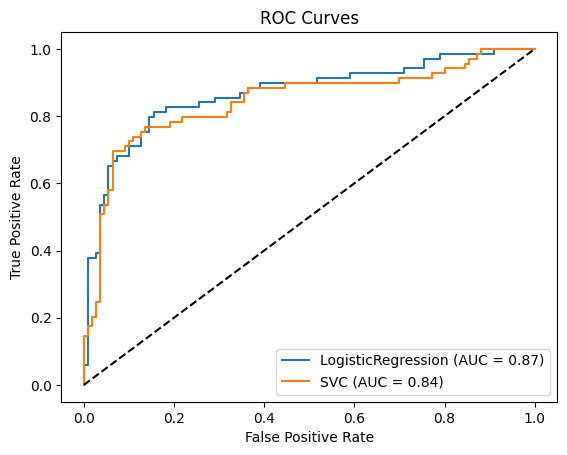

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt

for name, model in trained_models.items():
    print(f"\n=== {name} ===")
    y_pred = model.predict(X_test)
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

    # ROC Curve
    y_proba = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)

    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves")
plt.legend()
plt.show()

# Comparação

## Logistic Regression

* Acurácia: 0.81
* Precision classe 1 (sobreviveu): 0.78
* Recall classe 1: 0.71
* F1 classe 1: 0.74
* Matriz de confusão:
  * Falsos negativos relativamente altos (20 sobreviventes previstos como mortos).
  * Melhor recall que o SVC → consegue capturar mais sobreviventes.

## SVC

* Acurácia: 0.83 (ligeiramente superior)
* Precision classe 1: 0.84 (melhor que Logistic Regression)
* Recall classe 1: 0.70 (quase igual ao da regressão)
* F1 classe 1: 0.76 (melhor equilíbrio)
* Matriz de confusão:
  * Menos falsos positivos que Logistic Regression (9 vs 14).
  * Recall ligeiramente pior, mas compensa com maior precisão.

# Conclusão

* Ambos os modelos superaram o basiline
* SVC teve desempenho globalmente melhor, com acurácia e F1-score mais altos, além de maior precisão na identificação de sobreviventes.
* Logistic Regression é mais interpretável e teve recall ligeiramente superior, o que pode ser desejável em um problema sensível (melhor capturar mais sobreviventes, mesmo errando alguns falsos positivos).

## Se queremos maior interpretabilidade e recall, usar **Logistic Regression**.
## Se queremos melhor desempenho global, usar **SVC**.

# Próximos passos

* Ajuste de hiperparâmetros (GridSearchCV/RandomizedSearchCV):
  * LogisticRegression: variar regularização (C, penalty).
  * SVC: testar kernels (rbf, poly), C e gamma.
  * RandomForest: ajustar número de árvores, profundidade, etc.

* Feature importance: analisar quais variáveis impactam mais.

* Balanceamento de classes: dataset tem mais mortos que sobreviventes → testar class_weight="balanced".

* Ensembles: Voting Classifier ou Stacking combinando Logistic Regression + SVC.

# Atributos mais Relevantes

* Pela Logistic Regression (coeficientes) e importância de modelos de árvore (se quisermos verificar depois):

  * Sexo (Sex) → mulheres têm probabilidade muito maior de sobreviver (confirmado pela EDA inicial).

  * Classe (Pclass) → passageiros da 1ª classe sobreviveram mais.

  * Idade (Age) → crianças tendem a ter maior chance de sobrevivência.

  * Fare (preço da passagem) → associado ao status socioeconômico.

  * Title (Mr, Mrs, Miss etc.) → importante, pois carrega informação de idade/gênero.

  * FamilySize / IsAlone → quem viajava sozinho teve menos chance de sobreviver.

  * HasCabin → correlaciona com classe social, geralmente positivo para sobrevivência.